In [1]:
import pandas as pd
import numpy as np

# Graphical lasso

The graphical lasso is a method proposed by Friedman et al. in 2007 to estimate a sparse graph through a sparse penalty.


This models assumes that the covariates we are analyzing have a multivariate Gaussian distribution with mean $\mu$ and covariance $\Sigma$.

Moreover it is known that if the $ij$-th components of the inverse of the covariance matrix $\Sigma^{-1} = \Theta$ is zero, than the two variables $i$ and $j$ are conditionally independent given the others variable.

Some papers proposed different methods to reach an approximate solution of the problem, typically they are based on the maximization of a likelihood, derived from the distribution, given as 

$$ \text{log det}\Theta - \text{tr}(S\Theta) $$

where $\Theta$ is the inverse of the covariance matrix and its the unknown graph we want to estimate, and $S$ is the empirical covariance of our data. 
If we have a matrix $X \in \mathcal{R}^{n \times d}$ than $S=\frac{1}{n}X^TX \in \mathcal{R}^{d \times d}$

Since the $\Theta$ is supposed to be sparse the final functional imposes also a sparse penalty on it.

$$ \hat{\Theta} = \underset{\Theta}{\text{argmin}}\left(\text{tr}(S\Theta) - \text{log det}(\Theta) + \lambda\sum_{j\neq k}|\Theta_{jk}|\right)$$

## In this lab you are going infer a sparse network in two flavors:
    
    -Supervised
    -Unsupervised
    
**More specifically, you will be given n observations, drawn from a fully specified multivariate Gaussian distribution, whose precisione matrix is known. You will infer a precision matrix by maximizing a score in a cross-validation scheme (supervised) and then you will assume you do not know the underlying distribution (*i.e.* the precision matrix) and will try to infer a precision matrix in an unsupervised manner.**

Define the distribution, the number of samples, variables

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(20)

In [4]:
X = np.load('data.npy')
y = np.load('precision.npy')

**The precision matrix is the following `precision`**

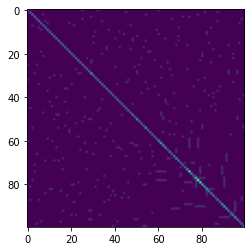

In [5]:
precision = np.load('precision.npy')

plt.imshow(precision)


**You are going to use the sklearn [GraphLasso](http://scikit-learn.org/stable/modules/generated/sklearn.covariance.GraphLasso.html#sklearn.covariance.GraphLasso)**

Define a plausible list of parameters for the model

In [6]:
alpha = 0.01 #regularization , the higher the alpha, the more regularization.

mode='cd' #bcz it is a binary classification

tol=0.0001 #tolerance to declare convergence

enet_tol=0.0001 #tolerance for the elastic net solver used to calculate the descent direction.

max_iter=100

verbose= False #bool, default=False, to avoid objective function and dual gap from being plotted at each iteration.

assume_centered= False #bool, default=False, to center data before computation

For each hyper-parameter in the list `alphas` fit a GraphicaLasso model to your data and choose the best one according to score of your choice (**Hint: remember that inferring the right edges is equivalent to inferring the right class in a binary classificaion problem**).

In [7]:
from scipy import linalg
from sklearn.covariance import GraphicalLassoCV
n_samples=100           
cov = linalg.inv(precision)

d=np.sqrt(np.diag(cov))

cov = cov / d
covT = cov/ d[:, np.newaxis]

precision= precision * d
precGT = precision *d[:, np.newaxis]
covEm = np.dot(X.T, X) / n_samples

model = GraphicalLassoCV()
model.fit(X)
covGL = model.covariance_
precGL = model.precision_


/home/mose/.local/lib/python3.8/site-packages/numpy/core/_methods.py:202: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


In [8]:
plt.figure(figsize=(10, 6))
plt.subplots_adjust(left=0.02, right=0.98)


<Figure size 720x432 with 0 Axes>

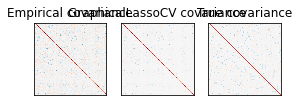

In [9]:
#covariances
covs = [('Empirical', covEm),('GraphicalLassoCV', covGL), ('True', covT)]
maxVar = covGL.max()

for i, (name, this_cov) in enumerate(covs):
    plt.subplot(2, 4, i + 1)
    plt.imshow(this_cov, interpolation='nearest', vmin=-maxVar, vmax=maxVar, cmap=plt.cm.RdBu_r)
    plt.xticks(())
    plt.yticks(())
    plt.title('%s covariance' % name)


In [10]:
# plot the precisions
precs = [('Empirical', linalg.inv(covEm)), ('GraphicalLasso', precGL), ('True', precT)]
maxVar = 0.9 * precGL.max()

for i, (name, this_prec) in enumerate(precs):
    ax = plt.subplot(2, 4, i + 1)
    plt.imshow(this_prec, interpolation='nearest', vmin=-maxVar, vmax=maxVar, cmap=plt.cm.RdBu_r)
    plt.xticks(())
    plt.yticks(())
    plt.title('%s precision' % name)

NameError: name 'precT' is not defined

/home/mose/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: The cv_alphas_ attribute is deprecated in version 0.24 in favor of cv_results_['alpha'] and will be removed in version 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)
/home/mose/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: The grid_scores_ attribute is deprecated in version 0.24 in favor of cv_results_ and will be removed in version 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


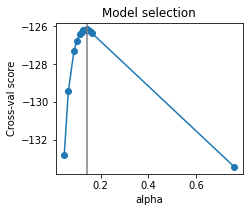

In [11]:
plt.figure(figsize=(4, 3))
plt.axes([.2, .25, .65, .7])

plt.plot(model.cv_alphas_, np.mean(model.grid_scores_, axis=1), 'o-')
plt.axvline(model.alpha_, color='.5')
plt.title('Model selection')
plt.ylabel('Cross-val score')
plt.xlabel('alpha')
plt.show()

In [12]:
alphas=np.array(model.cv_alphas_)
scores=np.array(model.score)

print('Best Alpha is',alphas[np.argmax(scores)])

Best Alpha is 0.7598523481271054


/home/mose/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: The cv_alphas_ attribute is deprecated in version 0.24 in favor of cv_results_['alpha'] and will be removed in version 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


In [13]:
from sklearn.covariance import GraphicalLasso
covModel = GraphicalLasso(alpha,mode,tol,enet_tol,max_iter,verbose,assume_centered)
covEst= covModel.fit(X) 

/home/mose/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass mode=cd, tol=0.0001, enet_tol=0.0001, max_iter=100, verbose=False, assume_centered=False as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
/home/mose/.local/lib/python3.8/site-packages/sklearn/covariance/_graph_lasso.py:267: ConvergenceWarning: graphical_lasso: did not converge after 100 iteration: dual gap: 3.971e-03
  warnings.warn('graphical_lasso: did not converge after '


Define a function able to recover the corresponding adjacency matrix from an arbitrary square matrix

In [150]:
adjacency= covModel.get_params(covEst)

(100, 100)
[[ 0.    0.   -0.17 ... -0.03 -0.1   0.04]
 [ 1.21 -0.05  0.09 ...  0.03 -0.17 -0.05]
 [ 0.9   0.07  0.03 ... -0.07  0.09  0.07]
 ...
 [ 1.18 -0.13 -0.1  ...  0.15  0.02 -0.13]
 [ 1.15  0.    0.   ... -0.11 -0.12 -0.07]
 [-0.05 -0.11  0.15 ...  0.16 -0.07  0.17]]


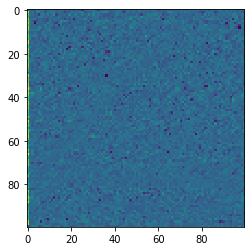

In [151]:
import networkx as nw

diG=nw.DiGraph(GTprec)
A=nw.linalg.graphmatrix.adjacency_matrix(diG)
adj=np.ndarray(([100,100]),A)
print(np.shape(adj))
NaNs = np.isnan(adj)
adj[NaNs] = 0
adj=np.round(adj,2)
print(adj)
plt.imshow(adj)


In [152]:
def prc_adj(prec):
    diG=nw.DiGraph(prec)
    AdjG=nw.linalg.graphmatrix.adjacency_matrix(diG)
    adj=np.ndarray(([100,100]),AdjG)
    NaNs = np.isnan(adj)
    adj[NaNs] = 0
    adj=np.round(adj,1)
    return adj

Compare the aground-truth adjacency matrix with the inferred one usign the **Hamming distance**

C:\Users\HP.000\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:56: RuntimeWarning: overflow encountered in multiply
  return getattr(obj, method)(*args, **kwds)


C:\Users\HP.000\Anaconda3\lib\site-packages\matplotlib\image.py:401: RuntimeWarning: overflow encountered in double_scalars
  newmin = vmid - dv * fact
C:\Users\HP.000\Anaconda3\lib\site-packages\matplotlib\image.py:406: RuntimeWarning: overflow encountered in double_scalars
  newmax = vmid + dv * fact


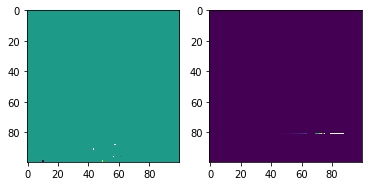

In [153]:
AdjGT=prc_adj(precGT)
AdjGL=prc_adj(precGL)

plt.subplot(1,2,1)
plt.imshow(AdjGT)

plt.subplot(1,2,2)
plt.imshow(AdjGL)

In [154]:
from scipy.spatial import distance
dist=distance.hamming(AdjGT.ravel, AdjGL.ravel)
print(dist)

1.0


### Unsupervised learning of the precision matrix

Assum that you do not know the precision matrix of the underlying data distribution. You need to perform inference of the precision matrix only using your observations. Typically, in this setting, Probabilistic model selection (or “information criteria”) provides an analytical technique for scoring and choosing among candidate models.

You are going to use the **`Bayesian Information Criterion (BIC)`**, ppropriate for models fit under the maximum likelihood estimation framework.

It is defined as:

$$BIC = -2LL + \log(N)k$$

where LL is the log-likelihood of the model, N is the number of examples in the training dataset, and k is the number of parameters in the model.

The score as defined above is minimized, e.g. the model with the lowest BIC is selected.

**Define a function for computing the BIC specific for the Graphical Lasso likelihood:**

$$ \text{log det}\Theta - \text{tr}(S\Theta) $$

In [155]:
# def BIC(#?)

In [156]:
from math import log

Empcov = np.dot(X.T, X) / n_samples

model = GraphicalLassoCV()
model.fit(X)
GLcov = model.covariance_
GLprec = model.precision_
log(np.linalg.det(GLprec))

C:\Users\HP.000\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


25.727289960955385

In [157]:
def BIC(n, mse, num_params):
    bic = n * np.log(mse) + num_params * log(n)
    return bic


In [158]:
params = GraphicalLasso().get_params(model)   
num_params = len(X) + 1 
bic = BIC(len(params), 0.11, num_params) 
print('BIC: %.3f' % bic)

BIC: 181.086


In [159]:
from sklearn import linear_model
Lars=linear_model.LassoLarsIC(criterion='bic')
Lars.fit(X,y)

#print(reg.coef_)

LassoLarsIC(copy_X=True, criterion='bic', eps=2.220446049250313e-16,
            fit_intercept=True, max_iter=500, normalize=True, positive=False,
            precompute='auto', verbose=False)

**Define a splitting scheme in order to obtain for each split the BIC and for each hyper-parameter a average BIC over the splits. Then plot the average BIC against the parameters.**

In [160]:
from sklearn.model_selection import ShuffleSplit, LeaveOneOut, KFold
import random
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import balanced_accuracy_score

def KFoldcv(k):
    kf=KFold(k)
    meanBIC=np.zeros((k,X.shape[1])) 
    
    for ith,(trind,teind) in enumerate(kf.split(X)): #https://scikit-learn.org/stable/auto_examples/exercises/plot_cv_diabetes.html#sphx-glr-auto-examples-exercises-plot-cv-diabetes-py
        meanBIC[ith,:]=np.mean(BIC(X.loc[trind]),axis=0)    

**After selecting the parameter which minimizes the BIC, compares the inferred network with the ground truth in terms of Hamming distance**

In [161]:
import itertools 

def splitDict(d): #split function
    n = len(d) // 2           
    i = iter(d.items())      
    d1 = dict(itertools.islice(i, n))   
    d2 = dict(i)                      
    return d1, d2

at=splitDict(params) 

In [162]:
num_params = len(precision) + 1

bic1 = BIC(len(at[0]), 0.11, num_params) 
print('BIC for 1st split: %.3f' % bic1)

bic2 = BIC(len(at[1]), 0.11, num_params) 
print('BIC for 2nd split: %.3f' % bic2)


BIC for 1st split: 104.338
BIC for 2nd split: 131.187


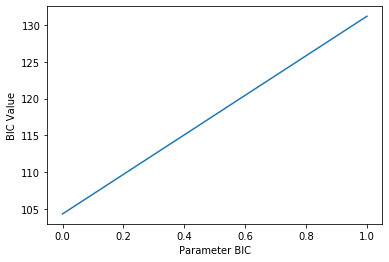

In [163]:
import matplotlib.pyplot as plt

plt.plot([bic1,bic2]) #plot average

plt.ylabel('BIC Value')
plt.xlabel('Parameter BIC')
plt.show()

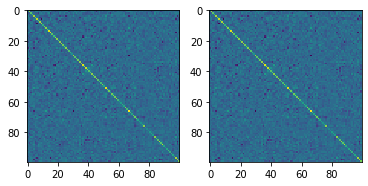

In [164]:
AdjGT=prc_adj(precGT)
AdjGL=prc_adj(precGT)

plt.subplot(1,2,1)
plt.imshow(AdjGT)

plt.subplot(1,2,2)
plt.imshow(AdjGL)